# Python for deep learning

## Cell 7

```python
from keras.models import Sequential
from keras.layers import Dense
from IPython.display import SVG
from keras.utils import model_to_dot

model = Sequential()
model.add(Dense(N*N-1, input_dim=(N*N), activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()
SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))
```

We create our neural network using a sequential model. In a sequential model we have a number of sequential layers of neurons where neurons in the layer N are conneted to neurons in the layer N+1.  

An alternative way of building a neural network is using the functional API, which allows to create the network as an arbitrary directed, acyclic graph. However we will only use the sequential model here.

## Creating the model

We create a sequential model by instanciating the class Sequential of keras. We can then add step by step the different layers of neurons. Keras makes this easy for us.

In [1]:
from keras.models import Sequential
model = Sequential()

Using TensorFlow backend.


The network is empty at the beginning.

## Adding the first layer

We do not explicitly add a layer of input neurons, instead we specify the size of the input when we add the first inner (hidden) layer of neurons. 

In [2]:
from keras.layers import Dense
N = 3
model.add(Dense(N*N-1, input_dim=(N*N), activation='relu'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 80        
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


We create the first hidden layer as a densly connected layer and add it to the model. The layer is created by instanciating the class Dense of keras. The parameters are the number of neurons in the layer, the size of the input vector and the name of the activation function for the neurons in the layer.

We choose an input vector of size 9. The first layer has 8 neurons. Densly connected means that each of the 9 inputs is connected to each of the 8 neurons in the layer. That means we have $9\cdot 8 = 72$ connections between the input neurons and the neurons in the first layer. Each connection has a weight associated. Initially the weights are choosen randomly. The values of the weights are a part of the parameters of the network, that will be modified during the training phase. 

In [3]:
model.weights

[<tf.Variable 'dense_1/kernel:0' shape=(9, 8) dtype=float32, numpy=
 array([[-0.49486157, -0.46365124, -0.20133156, -0.44390708,  0.02593178,
          0.32586426, -0.08730596,  0.4302361 ],
        [-0.38794386,  0.3573715 , -0.38198483, -0.5905899 ,  0.50744855,
          0.31425685,  0.14171809,  0.1584937 ],
        [ 0.0219028 , -0.14326015,  0.3264076 ,  0.45301437, -0.31929123,
          0.5131699 , -0.44844276,  0.10948139],
        [ 0.49943435,  0.38688183, -0.00693744,  0.4340936 ,  0.23669183,
         -0.20458832, -0.43538252,  0.411345  ],
        [-0.5566025 ,  0.4175403 ,  0.5045378 , -0.1625495 , -0.05191338,
         -0.5229175 ,  0.59169424, -0.2064155 ],
        [-0.05410826, -0.437638  ,  0.09534329, -0.0396989 , -0.28681788,
         -0.2008507 ,  0.4010011 ,  0.23694938],
        [ 0.03873605, -0.1920672 , -0.24408555,  0.32129973,  0.0504089 ,
         -0.5306237 ,  0.45898008, -0.2407907 ],
        [-0.47712675, -0.07024908,  0.10453445,  0.0502637 , -0.3757646

The summary of the model tells us that there are 80 parameters. 72 parameters are the weights of the connections. What are the remaining 8 parameters? Each neuron has an additional parameter, the bias. The output of a neuron is calculated by applying the activation function on the input values multiplied by the corresponding weights plus the bias. The summary shows that the biases of the eight neurons are initially 0. Like the weights, the biases will be modified in the training phase. 

As activation function we selected is ``relu``, which stands for `Rectified Linear Unit`. The ``relu`` function is defined as:

  $relu(x) = max(x,0)$

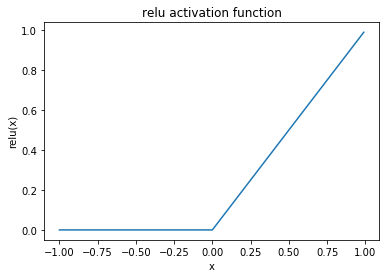

In [4]:
from matplotlib import pyplot as plt
import numpy as np
X = np.arange(-1, 1, 0.01)
Y = np.array([max(x, 0) for x in X])
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.title('relu activation function')
plt.show()

## Adding the second layer

The second and last layer contains one neuron that calculates the output of the network. The output is the probability of an input to belong the foreground. By thresholding the probability map a binary classification output is obtained.

The layer is densly connected to the previous layer. This means all units in the previous layer are connected to the only unit this layer. Since the previous layer has 8 units, this adds 9 more parameters to the model. 8 for the 8 weights of the connections and one for the bias of the output neuron.

In [5]:
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


As activation function we use a sigmoid function this time. Sigmoid functions have an S like shape and map arbitrary ranges into the interval [0, 1]. An example of a sigmoid function is the logistic function:

$f(x) = \frac{1}{1+e^{-x}}$

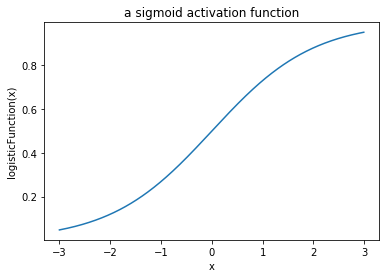

In [6]:
import math
def logisticFunction(x):
    return 1 / (1 + math.exp(-x))

X = np.arange(-3, 3, 0.01)
Y = np.array([logisticFunction(x) for x in X])
plt.plot(X, Y)
plt.xlabel("x")
plt.ylabel("logisticFunction(x)")
plt.title('a sigmoid activation function')
plt.show()

The advantage of using a sigmoid function for the output units in classification problems is that it yields a result between 0 and 1.

## Compiling the model

In the compilation step we configure the model for the training, by choose the loss-function, the optimizer and the metrics to be computed.

In [22]:
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

The loss function is the function that is minimized by the optimizer. It calculates the loss from a prediction and the true classification results. We pass in the name of one of the loss funcions from the module keras.losses. We use binary crossentropy because we are dealing with a binary classification problem.

The optimizer implements the optimization algorithm. We pass in the name of one of the optimizers from the module keras.optimizers. See [[1]](https://arxiv.org/abs/1609.04747) for an overview of gradient descent optimization algorithms. We use ``rmsprop``. We could also use ``Adam``, but rmsprop is a little bit faster and the performances are similar on this problem.

The third parameter is a list of metrics that will be calulatated during the training and validation. We calculate the accuracy. Depending on the loss function, accuracy is calculated in different ways. Since we have a binary classification, the binary accuracy is automatically used. It is calculated as the number of correct predictions divided by the number of all predictions.

## Displaying the model

The method summary of the model, displays the architecture of the module in text mode.

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 80        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


The non-trainable parameters in the summary are weights and biases that are kept constant. They are not modified during the training. We can make weights and biases of a layer non-trainable before compiling the model.

```python
    model.get_layer(layerName).trainable = False
```

This is useful if we want to reuse a pre-trained network for a similiar problem. A keras model has methods to save and load the trained model:
```python
    from keras.models import load_model
    model.save("mymodel.h5")
    model = load_model("mymodel.h5")
```

We can create a graphical representation using the function model_to_dot. 

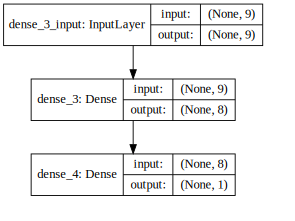

In [26]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

Here is a graphical representation of the network created with [NN-SVG](http://alexlenail.me/NN-SVG/index.html). Each circle represents a unit. In the first column are the input units. In the second column are the units of the first hidden layer. All units from a layer are connected to all units of the following layer.

<img 
    src="./pics/nn.svg" 
    alt="network"/>

## Literature

[1] Ruder, S. (2017). [An overview of gradient descent optimization algorithms](https://arxiv.org/abs/1609.04747). ArXiv:1609.04747 [Cs].
